# Collaboration and Competition

In [1]:
%matplotlib inline

from drl import drl_logger, EPOCH, EPISODE, STEP
from drl.experiment.analyser import Analyzer
from drl.experiment.configuration import Configuration
from drl.experiment.experiment import Experiment
from drl.experiment.config.experiment_config import ExperimentConfig
from drl.experiment.explorer import Explorer
from drl.logging import init_logging, set_logging_level, transform_verbose_count_to_logging_level

In [2]:
init_logging(EPISODE)

## Training Parameters

In [3]:
config = Configuration()
config.set_current_exp_cfg("tennis-linux")

### Agent

In [4]:
cfg = config.get_current_exp_cfg()

print("Action Size: {}".format(cfg.agent_cfg.action_size))
print("State Size:  {}".format(cfg.agent_cfg.state_size))

Action Size: 2
State Size:  24


### Hyper Parameters 

#### Epoch Configuration

In [5]:
print("Max Steps:            {}".format(cfg.trainer_cfg.max_steps))
print("Max Episode Steps:    {}".format(cfg.trainer_cfg.max_episode_steps))
print("Evaluation Frequency: {}".format(cfg.trainer_cfg.eval_frequency))
print("Evaluation Steps:     {}".format(cfg.trainer_cfg.eval_steps))

Max Steps:            150000
Max Episode Steps:    1000
Evaluation Frequency: 10000
Evaluation Steps:     2000


One Epoch contains:

* number of training episodes = evaluation frequency / max episode steps
* number of validation episoded = evaluatin steps / max episode steps

In [6]:
print("Max number of training episodes in epoch:   {}".format(int(cfg.trainer_cfg.eval_frequency/cfg.trainer_cfg.max_episode_steps)))
print("Max number of validation episodes in epoch: {}".format(int(cfg.trainer_cfg.eval_steps/cfg.trainer_cfg.max_episode_steps)))

Max number of training episodes in epoch:   10
Max number of validation episodes in epoch: 2


In [7]:
print("RL Algorithm:         {}".format(cfg.reinforcement_learning_cfg.algorithm_type))
print("Epsilon Start:        {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.epsilon_start))
print("Epsilon End:          {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.epsilon_end))
print("Epsilon Decay:        {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.epsilon_decay))
print("Actor Learning Rate:  {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.lr_actor))
print("Critic Learning Rate: {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.lr_critic))
print("Weight Decay:         {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.weight_decay))

RL Algorithm:         ddpg
Epsilon Start:        1.5
Epsilon End:          0.1
Epsilon Decay:        0.998
Actor Learning Rate:  0.0001
Critic Learning Rate: 0.0003
Weight Decay:         0


#### Neural Network Configuration

In [8]:
print("Actor Hidden Layers Units:  {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.actor_model_cfg.hidden_layers))
print("Critic Hidden Layers Units: {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.critic_model_cfg.hidden_layers))
print("Gamma:                      {}".format(cfg.trainer_cfg.gamma))
print("Tau:                        {}".format(cfg.trainer_cfg.tau))
print("Update Every:               {}".format(cfg.trainer_cfg.update_every))
print("Number of Updates:          {}".format(cfg.trainer_cfg.num_updates))

Actor Hidden Layers Units:  [256, 128]
Critic Hidden Layers Units: [256, 128]
Gamma:                      0.99
Tau:                        0.001
Update Every:               2
Number of Updates:          4


#### Replay Memory

In [9]:
print("Buffer Size:              {}".format(cfg.replay_memory_cfg.buffer_size))
print("Batch size:               {}".format(cfg.trainer_cfg.batch_size))
print("Use Prioritized Replay:   {}".format(cfg.replay_memory_cfg.prioritized_replay))
print("Prioritized replay alpha: {}".format(cfg.replay_memory_cfg.prioritized_replay_alpha))
print("Prioritized replay beta0: {}".format(cfg.replay_memory_cfg.prioritized_replay_beta0))
print("Prioritized replay eps:   {}".format(cfg.replay_memory_cfg.prioritized_replay_eps))


Buffer Size:              100000
Batch size:               128
Use Prioritized Replay:   True
Prioritized replay alpha: 0.6
Prioritized replay beta0: 0.4
Prioritized replay eps:   1e-06


## Training

In [10]:
experiment = Experiment(config)

In [ ]:
scores = experiment.train()

2020-10-10 08:35:50,970 - drl - INFO - Initializing environment.' - {'name': 'env/unity/linux/tennis-novis/Tennis.x86_64'}


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


2020-10-10 08:35:52,860 - drl - EPISODE - Train. - {'step': 15, 'episode': 0, 'epoch': 0, 'epoch_step': 15, 'epoch_episode': 1, 'episode_step': 14, 'score': '0.000', 'eps': '1.500', 'elapsed': '2s'}
2020-10-10 08:35:54,285 - drl - EPISODE - Train. - {'step': 29, 'episode': 1, 'epoch': 0, 'epoch_step': 29, 'epoch_episode': 2, 'episode_step': 13, 'score': '0.000', 'eps': '1.497', 'elapsed': '1s'}
2020-10-10 08:35:55,693 - drl - EPISODE - Train. - {'step': 43, 'episode': 2, 'epoch': 0, 'epoch_step': 43, 'epoch_episode': 3, 'episode_step': 13, 'score': '0.000', 'eps': '1.494', 'elapsed': '1s'}
2020-10-10 08:36:01,299 - drl - EPISODE - Train. - {'step': 96, 'episode': 3, 'epoch': 0, 'epoch_step': 96, 'epoch_episode': 4, 'episode_step': 52, 'score': '0.100', 'eps': '1.491', 'elapsed': '6s'}
2020-10-10 08:36:02,839 - drl - EPISODE - Train. - {'step': 110, 'episode': 4, 'epoch': 0, 'epoch_step': 110, 'epoch_episode': 5, 'episode_step': 13, 'score': '0.000', 'eps': '1.488', 'elapsed': '2s'}
202

## Analasys

The project is solved in epoch 32 after playing 1088 episodes.

In [11]:
session_id = experiment.get_session_id()
print("Session ID: {}".format(session_id))

Session ID: tennis-linux-20201010T0830


In [12]:
session_id = "tennis-linux-20201010T0828"

analyzer = Analyzer(config, session_id)

In [13]:
experiments = [
    '_experiments/train/tennis-linux-20201004T1207',
]

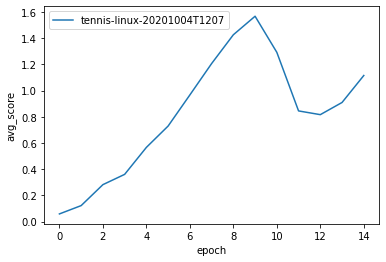

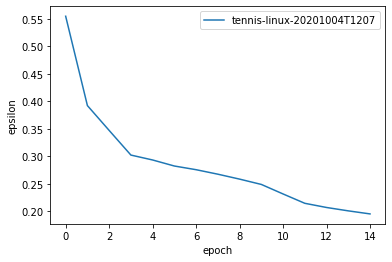

In [14]:
analyzer.compare_train_epoch_cols(experiments, 'avg_score', True)
analyzer.compare_train_epoch_cols(experiments, 'epsilon', True)

## Stored Models

In [15]:
!ls _experiments/train/tennis-linux-20201004T1207

config.json
episode-log.csv
epoch-log.csv
tennislinux_current_actor_tennis-linux-20201004T1207_0_0.06_0.06_0.55.pth
tennislinux_current_actor_tennis-linux-20201004T1207_1_0.12_0.16_0.39.pth
tennislinux_current_actor_tennis-linux-20201004T1207_10_1.29_2.63_0.23.pth
tennislinux_current_actor_tennis-linux-20201004T1207_11_0.85_2.63_0.21.pth
tennislinux_current_actor_tennis-linux-20201004T1207_12_0.82_2.63_0.21.pth
tennislinux_current_actor_tennis-linux-20201004T1207_13_0.91_1.73_0.20.pth
tennislinux_current_actor_tennis-linux-20201004T1207_14_1.12_1.75_0.20.pth
tennislinux_current_actor_tennis-linux-20201004T1207_2_0.28_2.63_0.35.pth
tennislinux_current_actor_tennis-linux-20201004T1207_3_0.36_0.72_0.30.pth
tennislinux_current_actor_tennis-linux-20201004T1207_4_0.57_1.30_0.29.pth
tennislinux_current_actor_tennis-linux-20201004T1207_5_0.73_1.72_0.28.pth
tennislinux_current_actor_tennis-linux-20201004T1207_6_0.97_2.63_0.28.pth
tennislinux_current_actor_tennis-linux-20201004T1207_7_1.21_2.55_

## Play With a Trained Agent

In [16]:
scores, mean = experiment.play(
    mode='train', # human, train
    model='_experiments/train/tennis-linux-20201004T1207/tennislinux_current_actor_tennis-linux-20201004T1207_9_1.57_0.52_0.25.pth',
    num_episodes=2)

2020-10-10 08:30:34,744 - drl - INFO - Initializing environment.' - {'name': 'env/unity/linux/tennis-novis/Tennis.x86_64'}


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


2020-10-10 08:30:39,697 - drl - EPISODE - Play. - {'episode': 0, 'score': '-0.005', 'elapsed': '1.760s'}
2020-10-10 08:31:52,391 - drl - EPISODE - Play. - {'episode': 1, 'score': '1.795', 'elapsed': '72.678s'}


In [17]:
print("Average score over {} episodes is {}".format(len(scores), mean))

Average score over 2 episodes is 0.8950000135228038
